# Logistic Regression

>### [예제 9] Logistic Regression(NumPy)

>### Load modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt

print("NumPy Version :{}".format(np.__version__))
print("Matplotlib Version :{}".format(plt.matplotlib.__version__))

NumPy Version :1.18.5
Matplotlib Version :3.2.2


> ### Input and Label

In [2]:
# Logistic regression : Binary Classification data
x_input = np.array([[1, 1], [2, 1], [1, 2], [0.5, 4], [4, 1], [2.5, 2.3]], dtype= np.float32)
labels = np.array([[0], [0], [0], [1], [1], [1]], dtype= np.float32)

# Weight, Bias
W = np.random.normal(size=(2,1))
B = np.random.normal(size=())

>### Activation Function : Sigmoid Function
>$\sigma(x) = \frac{1}{1+e^{-x}}$
>### Hypothesis : Logistic Equation
>### $H(x) = \sigma(XW + b$)

In [3]:
# Activate Function: Sigmoid Function
def Sigmoid(x):
    return 1 / (1+np.exp(-x))

# Hypothesis
def Hypothesis(x):
    return Sigmoid(np.matmul(x, W) + B)

>### Cost Function : Cross Entropy Error
>### $cost(W,b) = \frac{1}{m}\sum_{i=1}^{m}t\log{H(x_{i}})+(1-t)\log{(1-H(x_{i}}))$

In [4]:
# Cost Function: Cross Entropy Error
def Cost():
    return -np.mean(labels*np.log(Hypothesis(x_input)) + (1-labels)*np.log(1-Hypothesis(x_input)))

>### Gradient
>### $\frac{d}{dx}f(x) = \lim_{\delta = 0} \frac{f(x+\delta) - f(x-\delta)}{2\delta}$

In [5]:
# Gradient
def Gradient():
    global W, B
    pres_W = W.copy()
    grad_W = np.zeros_like(W)
    delta = 5e-7

    for idx in range(W.size):
      W[idx,0] = pres_W[idx,0] + delta
      cost_p = Cost()
      W[idx,0] = pres_W[idx,0] - delta
      cost_m = Cost()
      grad_W[idx,0] = (cost_p-cost_m)/(2*delta)
      W[idx,0] = pres_W[idx,0]

    pres_B = B
    B = pres_B + delta
    cost_p = Cost()
    B = pres_B - delta
    cost_m = Cost()
    grad_B = (cost_p-cost_m)/(2*delta)
    B = pres_B

    return grad_W, grad_B

>### 학습 준비 과정

>### Training
>### $\mu$ : Learning rate
>### $W = W - \mu\frac{\partial}{\partial W}cost(W, b)$
>### $b = b - \mu\frac{\partial}{\partial b}cost(W, b)$

In [6]:
%%time

# Parameter Set
epochs = 100000
learning_rate = 0.01

training_idx = np.arange(0, epochs+1, 1)
cost_graph = np.zeros(epochs+1)
check = np.array([0, epochs*0.01, epochs*0.08, epochs*0.2, epochs*0.4, epochs])

w_trained = []
b_trained = []
w_trained.append(W.copy())
b_trained.append(B.copy())
check_idx = 1

# 학습 (Training)
for cnt in range(0, epochs+1):
    cost_graph[cnt] = Cost()
    if cnt % (epochs/20) == 0:
        print("[{:>6}] cost = {:>10.4}, w = [{:>7.4} {:>7.4}], b = {:>7.4}".format(cnt, cost_graph[cnt], W[0,0], W[1,0], B))
    if check[check_idx] == cnt:
        w_trained.append(W.copy())
        b_trained.append(B.copy())
        check_idx += 1

    grad_W, grad_B = Gradient()
    W -= learning_rate * grad_W
    B -= learning_rate* grad_B

[     0] cost =      1.642, w = [ 0.8003  0.2143], b =   1.869
[  5000] cost =     0.3298, w = [ 0.8831   1.039], b =  -3.274
[ 10000] cost =     0.1953, w = [  1.462   1.695], b =  -5.685
[ 15000] cost =     0.1384, w = [  1.841   2.123], b =  -7.263
[ 20000] cost =      0.107, w = [  2.122   2.442], b =  -8.437
[ 25000] cost =    0.08713, w = [  2.347   2.696], b =  -9.373
[ 30000] cost =    0.07343, w = [  2.533   2.907], b =  -10.15
[ 35000] cost =    0.06342, w = [  2.693   3.088], b =  -10.81
[ 40000] cost =    0.05579, w = [  2.832   3.246], b =  -11.39
[ 45000] cost =    0.04979, w = [  2.955   3.386], b =  -11.91
[ 50000] cost =    0.04494, w = [  3.066   3.512], b =  -12.37
[ 55000] cost =    0.04094, w = [  3.167   3.626], b =  -12.79
[ 60000] cost =     0.0376, w = [  3.259   3.731], b =  -13.18
[ 65000] cost =    0.03475, w = [  3.344   3.827], b =  -13.53
[ 70000] cost =    0.03231, w = [  3.423   3.917], b =  -13.86
[ 75000] cost =    0.03018, w = [  3.497     4.0], b = 

In [7]:
print("[Training Test]")

y = Hypothesis(x_input)
Y = [int(y_elem>0.5) for y_elem in y]
for idx in range(x_input.shape[0]):
    print("Input {} , Target : {} => Y :{:>2}(y:{:>5.2})".format(x_input[idx], labels[idx][0], Y[idx], y[idx][0]))

[Training Test]
Input [1. 1.] , Target : 0.0 => Y : 0(y:0.00068)
Input [2. 1.] , Target : 0.0 => Y : 0(y: 0.03)
Input [1. 2.] , Target : 0.0 => Y : 0(y: 0.05)
Input [0.5 4. ] , Target : 1.0 => Y : 1(y: 0.98)
Input [4. 1.] , Target : 1.0 => Y : 1(y: 0.98)
Input [2.5 2.3] , Target : 1.0 => Y : 1(y: 0.98)


In [8]:
print("\n[ Prediction by specific data ]")    
test_in = np.array([[1.5,1.5],[3.0,3.0],[4.0,2.0],[1.9,1.9]])
for i in test_in:
    print("input [{},{}] => Group {:.2f}".format(i[0],i[1],Hypothesis(i)[0]))


[ Prediction by specific data ]
input [1.5,1.5] => Group 0.04
input [3.0,3.0] => Group 1.00
input [4.0,2.0] => Group 1.00
input [1.9,1.9] => Group 0.51


>### Plotting

<function matplotlib.pyplot.show>

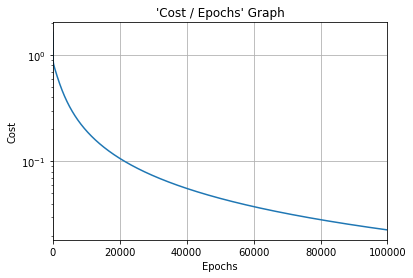

In [9]:
# Training 상황에 대한 그래프 출력
# Training 회수 별 Cost 값
plt.title("'Cost / Epochs' Graph")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.plot(training_idx, cost_graph)
plt.xlim(0, epochs)
plt.grid(True)
plt.semilogy()
plt.show

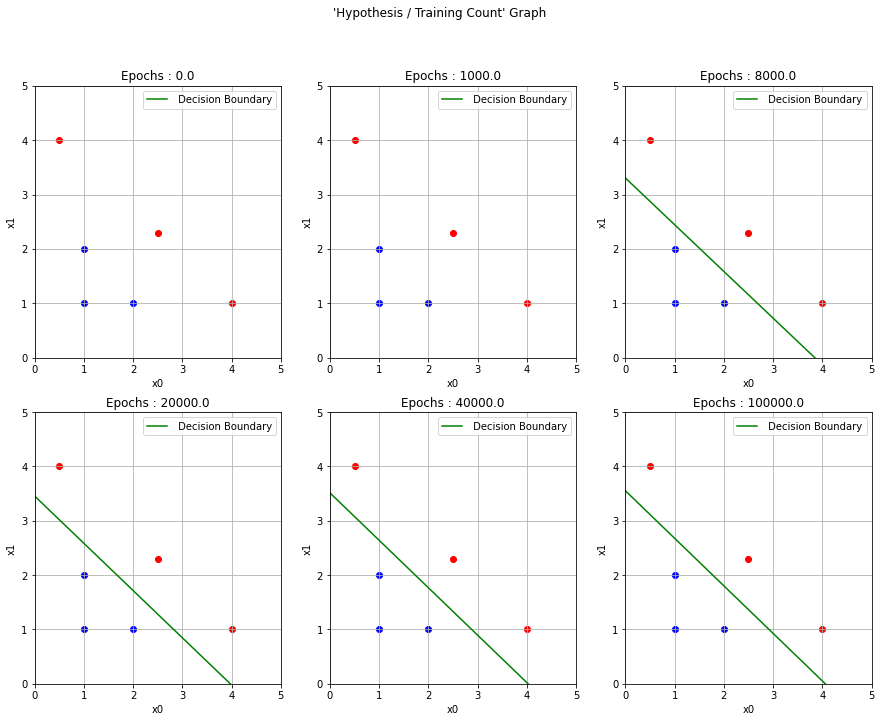

In [10]:
# 구분선 그리기
x_decision = np.linspace(0, 5, 1000)
fig, ax = plt.subplots(2, 3, figsize=(15, 11))
fig.suptitle("'Hypothesis / Training Count' Graph")

for ax_idx in range(check.size):
    W = w_trained[ax_idx]
    B = b_trained[ax_idx]
    y_decision = -(W[0] * x_decision + B)/W[1] 

    #   label의 값에 따라서 blue 또는 red 점 찍기
    for i in range(labels.shape[0]):
        if(labels[i][0] == 0):
            ax[ax_idx // 3][ax_idx % 3].scatter(x_input[i][0], x_input[i][1], color='blue')
        else:
            ax[ax_idx // 3][ax_idx % 3].scatter(x_input[i][0], x_input[i][1], color='red')
   
    ax[ax_idx // 3][ax_idx % 3].plot(x_decision, y_decision, label=' Decision Boundary', color='green')

    ax[ax_idx // 3][ax_idx % 3].set_title("Epochs : {}".format(check[ax_idx]))
    ax[ax_idx // 3][ax_idx % 3].set_xlim((0, 5))
    ax[ax_idx // 3][ax_idx % 3].set_ylim((0, 5))
    ax[ax_idx // 3][ax_idx % 3].set_xlabel("x0")
    ax[ax_idx // 3][ax_idx % 3].set_ylabel("x1")
    ax[ax_idx // 3][ax_idx % 3].grid(True)
    ax[ax_idx // 3][ax_idx % 3].legend()
    
plt.show()